<a href="https://colab.research.google.com/github/lethikieuanh1204-a11y/thesis/blob/main/Thesis(Hybrid).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input

In [ ]:
!pip install ta

In [ ]:
import ta
import pandas as pd
import numpy as np
import yfinance as yf

# Tải dữ iliệu từ Yahoo Finance
ASSETS = ["FPT.VN", "VIC.VN", "VCB.VN", "GAS.VN", "HPG.VN"]  # Bỏ VNINDEX ra
START_DATE = "2020-01-01"
END_DATE = "2025-01-01"

# Tạo dictionary để lưu dữ liệu từng mã
stocks_data = {}
for symbol in ASSETS:
    df = yf.download(symbol, start=START_DATE, end=END_DATE)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]  # Chọn các cột cần thiết
    stocks_data[symbol] = df

/tmp/ipython-input-2912116102.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2912116102.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2912116102.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2912116102.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-291211610

In [ ]:
for symbol, df in stocks_data.items():
    print("=" * 60)
    print(f"Dữ liệu cổ phiếu: {symbol}")
    print(df.head(10))


Dữ liệu cổ phiếu: FPT.VN
Price               Open          High           Low         Close   Volume
Ticker            FPT.VN        FPT.VN        FPT.VN        FPT.VN   FPT.VN
Date                                                                       
2020-01-02  22916.110739  23191.261068  22798.188376  23034.031250  2164345
2020-01-03  23151.952053  23230.566957  22562.343980  22640.957031  4942819
2020-01-06  22444.420732  22640.956130  22326.498381  22405.113281  2634859
2020-01-07  22523.036380  22837.494141  22405.114025  22837.494141  2020780
2020-01-08  22601.650195  22680.263242  22326.498047  22326.498047  4437500
2020-01-09  22523.036529  22680.264483  22444.421625  22640.957031  2334095
2020-01-10  22601.650391  22719.570888  22444.420590  22601.650391  2458638
2020-01-13  22562.342269  22640.955314  22405.112473  22444.419922  1993075
2020-01-14  22444.420732  22562.343083  22405.113281  22405.113281  1943884
2020-01-15  22405.113281  22444.420732  22326.498381  22405.113

In [ ]:
# In dữ liệu cho mã VCB.VN
vcb_data = stocks_data["VCB.VN"]
print("=" * 60)
print(f"Dữ liệu cổ phiếu VCB.VN:")
print(vcb_data.head(10))

Dữ liệu cổ phiếu VCB.VN:
Price               Open          High           Low         Close   Volume
Ticker            VCB.VN        VCB.VN        VCB.VN        VCB.VN   VCB.VN
Date                                                                       
2020-01-02  39747.175948  40275.960743  39526.846687  40011.566406   870270
2020-01-03  40320.025537  40452.224643  39614.976562  39614.976562  1207844
2020-01-06  39306.516379  39438.715483  38557.402344  38557.402344  1982797
2020-01-07  38337.073175  38733.662732  37632.024213  38689.597656  2529103
2020-01-08  38293.009142  38733.663786  37984.549728  38337.074219  1897570
2020-01-09  38645.532893  39174.321558  38645.532893  39086.191406  2040337
2020-01-10  39086.190369  39835.304393  38733.662017  39438.714844  3596527
2020-01-13  39218.388128  39570.912625  39218.388128  39394.648438  3880278
2020-01-14  39438.717393  39659.042780  39262.453205  39394.648438  2255442
2020-01-15  39482.781137  39482.781137  39130.256652  39350.582

In [ ]:
# Tạo DataFrame với giá đóng cửa cho từng cổ phiếu
df_close = pd.concat({tk: d['Close'] for tk, d in stocks_data.items()}, axis=1)
df_close.columns = df_close.columns.droplevel(0)  # Đổi tên cột sau khi concat

# Tính toán tỷ lệ log return hàng ngày
daily_log_returns = np.log(df_close / df_close.shift(1))

# Khởi tạo danh sách lưu trữ các đặc trưng
rows = []

# Lấy các dữ liệu đặc trưng từ mỗi cổ phiếu
for ticker in daily_log_returns.columns:
    df_feat = pd.DataFrame({
        "date": daily_log_returns.index,
        "ticker": ticker,
        "return": daily_log_returns[ticker],
        "return_lag1": daily_log_returns[ticker].shift(1),
        "return_lag5": daily_log_returns[ticker].shift(5),
        "return_lag10": daily_log_returns[ticker].shift(10),
    })

    # 1. Lợi suất & Biến động (Return & Volatility)
    df_feat["volatility"] = daily_log_returns[ticker].rolling(21).std() * np.sqrt(252)  # 21-day STD
    df_feat["ewma_volatility"] = daily_log_returns[ticker].ewm(span=21).std() * np.sqrt(252)  # EWMA volatility

    # 2. Momentum & MA/EMA
    df_feat["ret_5"] = np.log(df_close[ticker] / df_close[ticker].shift(5)) - 1  # Return tích lũy 5 ngày
    df_feat["ret_10"] = np.log(df_close[ticker] / df_close[ticker].shift(10)) - 1  # Return tích lũy 10 ngày
    df_feat["ret_21"] = np.log(df_close[ticker] / df_close[ticker].shift(21)) - 1  # Return tích lũy 21 ngày

    short_mom = df_close[ticker] / df_close[ticker].shift(5) - 1  # Momentum ngắn hạn
    long_mom  = df_close[ticker] / df_close[ticker].shift(21) - 1  # Momentum dài hạn
    df_feat["momentum_diff"] = short_mom - long_mom  # Momentum chênh lệch

    df_feat["SMA20_ratio"] = df_close[ticker] / df_close[ticker].rolling(20).mean() - 1  # SMA20 ratio
    df_feat["SMA50_ratio"] = df_close[ticker] / df_close[ticker].rolling(50).mean() - 1  # SMA50 ratio
    df_feat["EMA12_ratio"] = df_close[ticker] / df_close[ticker].ewm(span=12).mean() - 1  # EMA12 ratio
    df_feat["EMA26_ratio"] = df_close[ticker] / df_close[ticker].ewm(span=26).mean() - 1  # EMA26 ratio

    # 3. Dao động & Sức mạnh (Oscillators & Strength)
    EMA12 = df_close[ticker].ewm(span=12).mean()
    EMA26 = df_close[ticker].ewm(span=26).mean()
    df_feat["MACD"] = EMA12 - EMA26  # MACD

    df_feat["RSI14"] = ta.momentum.RSIIndicator(df_close[ticker], window=14).rsi()  # RSI14

    # Bollinger Bands
    mavg = df_close[ticker].rolling(20).mean()
    std = df_close[ticker].rolling(20).std()
    upper = mavg + 2 * std
    lower = mavg - 2 * std
    df_feat["Boll_width"] = (upper - lower) / mavg  # Bollinger width
    df_feat["Boll_percB"] = (df_close[ticker] - lower) / (upper - lower)  # Bollinger %B

    # 4. Độ rộng/Biến động Giá (Range/Price Action)
        # ATR (Average True Range)
    # Ensure high, low, close are Series for correct calculations
    high = stocks_data[ticker]["High"].squeeze()
    low = stocks_data[ticker]["Low"].squeeze()
    close = stocks_data[ticker]["Close"].squeeze()

    # Tính toán True Range (TR)
    tr = np.maximum(
      (high - low),
       np.maximum(
         (high - close.shift(1)).abs(),
         (low - close.shift(1)).abs()
       )
      )


    # Tạo Series cho TR với index từ giá đóng cửa
    tr_series = pd.Series(tr, index=close.index)

    # Tính ATR (Average True Range) theo chu kỳ 14 ngày
    df_feat["ATR"] = tr_series.rolling(14).mean() / close

    # Reindex lại theo ngày để phù hợp với dữ liệu của df_feat
    df_feat["ATR"] = df_feat["ATR"].reindex(df_feat["date"])

    rows.append(df_feat)

    # 5. Khối lượng (Volume)
    ticker_volume = stocks_data[ticker]['Volume']
    log_vol = np.log(ticker_volume.replace(0, np.nan))
    df_feat["Volume_diff"] = log_vol.diff().reindex(df_feat["date"])  # Thay đổi log-volume


# Gộp lại tất cả ticker
features = pd.concat(rows, axis=0).sort_values(["ticker", "date"]).reset_index(drop=True)

# 7) Target = return ngày kế tiếp
features = features.sort_values(["ticker", "date"])
features["target"] = features.groupby("ticker")["return"].shift(-1).rolling(5).mean()

# 8) Làm sạch dữ liệu (bỏ tất cả NaN phát sinh)
df = features.dropna().reset_index(drop=True)

# Kiểm tra kết quả cuối cùng
print("Dataset cuối cùng:", df.shape)
print(df.head())


Dataset cuối cùng: (6000, 23)
        date  ticker    return  return_lag1  return_lag5  return_lag10  \
0 2020-03-18  FPT.VN -0.002064     0.018731    -0.017562     -0.007181   
1 2020-03-19  FPT.VN -0.014568    -0.002064    -0.054614     -0.016349   
2 2020-03-20  FPT.VN  0.000000    -0.014568     0.001039     -0.011050   
3 2020-03-23  FPT.VN -0.071692     0.000000    -0.011488     -0.070979   
4 2020-03-24  FPT.VN  0.002250    -0.071692     0.018731      0.027453   

   volatility  ewma_volatility     ret_5    ret_10  ...  SMA50_ratio  \
0    0.404102         0.405355 -1.048397 -1.136883  ...    -0.108836   
1    0.404905         0.388145 -1.008351 -1.135102  ...    -0.118185   
2    0.404441         0.371495 -1.009390 -1.124053  ...    -0.114946   
3    0.460417         0.467603 -1.069593 -1.124766  ...    -0.172306   
4    0.447805         0.451072 -1.086075 -1.149969  ...    -0.166214   

   EMA12_ratio  EMA26_ratio        MACD      RSI14  Boll_width  Boll_percB  \
0    -0.039973

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

def adf_summary_full(df):
    results = []
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # chỉ lấy cột số

    for col in numeric_cols:
        series = df[col].dropna()
        if len(series) < 20:  # bỏ qua cột có quá ít quan sát
            continue
        adf_result = adfuller(series, autolag='AIC')
        pval = adf_result[1]
        stat = adf_result[0]
        crit = adf_result[4]['5%']
        results.append({
            'Variable': col,
            'ADF Statistic': round(stat, 4),
            'p-value': round(pval, 4),
            '5% Critical Value': round(crit, 4),
            'Stationary': 'Yes' if pval < 0.05 else 'No'
        })

    return pd.DataFrame(results)

# Gọi hàm trên toàn bộ dataframe của bạn
adf_table_full = adf_summary_full(df)
print(adf_table_full)


           Variable  ADF Statistic  p-value  5% Critical Value Stationary
0            return       -14.8889      0.0             -2.862        Yes
1       return_lag1       -14.8932      0.0             -2.862        Yes
2       return_lag5       -15.0065      0.0             -2.862        Yes
3      return_lag10       -15.1533      0.0             -2.862        Yes
4        volatility        -8.6778      0.0             -2.862        Yes
5   ewma_volatility        -9.9550      0.0             -2.862        Yes
6             ret_5       -13.1056      0.0             -2.862        Yes
7            ret_10       -12.1856      0.0             -2.862        Yes
8            ret_21       -12.6193      0.0             -2.862        Yes
9     momentum_diff       -11.1106      0.0             -2.862        Yes
10      SMA20_ratio       -13.1137      0.0             -2.862        Yes
11      SMA50_ratio       -11.4886      0.0             -2.862        Yes
12      EMA12_ratio       -13.0710    

In [ ]:
# --- 1. Chuẩn bị ---
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

df = df.sort_values(["ticker", "date"]).reset_index(drop=True)

non_feature = ['date', 'ticker', 'target']
feature_cols = [c for c in df.columns if c not in non_feature]

TICKERS = df['ticker'].unique()

selected_features_by_ticker = {}

# --- 2. LASSO riêng cho từng mã ---
for ticker in TICKERS:
    print(f"\nRunning LASSO for {ticker}")

    df_tk = df[df['ticker'] == ticker].copy()
    df_tk = df_tk.sort_values("date")

    X = df_tk[feature_cols].values
    y = df_tk["target"].values

    # Train/test theo thời gian
    split_index = int(len(X) * 0.8)
    X_train, y_train = X[:split_index], y[:split_index]

    # Scale
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # GridSearch alpha
    lasso_grid = GridSearchCV(
        Lasso(max_iter=20000),
        param_grid={'alpha': np.logspace(-4, 0, 40)},
        cv=5,
        scoring='neg_mean_squared_error'
    )

    lasso_grid.fit(X_train_scaled, y_train)
    best_alpha = lasso_grid.best_params_['alpha']

    lasso_best = Lasso(alpha=best_alpha, max_iter=20000)
    lasso_best.fit(X_train_scaled, y_train)

    coef = pd.Series(lasso_best.coef_, index=feature_cols)
    selected_features = coef[coef != 0].index.tolist()

    selected_features_by_ticker[ticker] = selected_features

    print(f"Best α: {best_alpha}")
    print(f"Selected features ({len(selected_features)}): {selected_features}")



Running LASSO for FPT.VN
Best α: 0.0001
Selected features (11): ['return_lag1', 'return_lag5', 'ewma_volatility', 'ret_5', 'ret_10', 'momentum_diff', 'SMA20_ratio', 'EMA12_ratio', 'MACD', 'Boll_width', 'Volume_diff']

Running LASSO for GAS.VN
Best α: 0.0001
Selected features (9): ['return', 'return_lag5', 'ret_5', 'ret_10', 'momentum_diff', 'EMA12_ratio', 'MACD', 'Boll_width', 'Volume_diff']

Running LASSO for HPG.VN
Best α: 0.0001
Selected features (10): ['return_lag1', 'return_lag5', 'return_lag10', 'ewma_volatility', 'ret_5', 'ret_10', 'momentum_diff', 'EMA12_ratio', 'MACD', 'Boll_width']

Running LASSO for VCB.VN
Best α: 0.0001
Selected features (9): ['return_lag1', 'return_lag5', 'return_lag10', 'ewma_volatility', 'ret_5', 'ret_10', 'momentum_diff', 'EMA12_ratio', 'MACD']

Running LASSO for VIC.VN
Best α: 0.0001
Selected features (10): ['return_lag1', 'return_lag5', 'return_lag10', 'ret_5', 'ret_10', 'momentum_diff', 'SMA20_ratio', 'EMA12_ratio', 'MACD', 'RSI14']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ======================
# PARAMS
# ======================
SEQ_LEN = 20
EPOCHS = 100
BATCH_SIZE = 32

TICKERS = sorted(selected_features_by_ticker.keys())

# ======================
# SEQUENCE FUNCTION
# ======================
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(seq_len, len(X)):
        X_seq.append(X[i-seq_len:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

# ======================
# LSTM MODEL
# ======================
def build_lstm_model(n_features):
    model = Sequential([
        LSTM(64, input_shape=(SEQ_LEN, n_features)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# ======================
# TRAIN LSTM PER TICKER
# ======================
results_lstm = {}

for ticker in TICKERS:
    print(f"\nTraining LSTM for {ticker}")

    df_tk = df[df['ticker'] == ticker].copy()
    df_tk = df_tk.sort_values('date')

    features_tk = selected_features_by_ticker[ticker]

    # Skip nếu LASSO chọn quá ít feature
    if len(features_tk) < 3:
        print(f"⏭️ Skip {ticker} (only {len(features_tk)} features)")
        continue

    X = df_tk[features_tk].values
    y = df_tk['target'].values

    # Train / Test split theo thời gian
    split_index = int(len(X) * 0.8)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Scale
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Sequence
    X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, SEQ_LEN)
    X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, SEQ_LEN)

    # Build + train
    model = build_lstm_model(X_train_seq.shape[2])
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    model.fit(
        X_train_seq, y_train_seq,
        validation_split=0.1,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[early_stop],
        verbose=0
    )

    # Predict
    y_pred = model.predict(X_test_seq).flatten()

    # Metrics
    mae = mean_absolute_error(y_test_seq, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_seq, y_pred))
    r2 = r2_score(y_test_seq, y_pred)
    da = np.mean((y_test_seq > 0) == (y_pred > 0)) * 100

    results_lstm[ticker] = {
        "model": model,
        "features": features_tk,
        "mae": mae,
        "rmse": rmse,
        "r2": r2,
        "da": da,
        "y_true": y_test_seq,
        "y_pred": y_pred
    }

    print(f"{ticker}:MAE={mae:.4f}, RMSE={rmse:.4f}, R²={r2:.3f}, DA={da:.2f}%")



Training LSTM for FPT.VN


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
FPT.VN:MAE=0.0047, RMSE=0.0060, R²=0.267, DA=66.36%

Training LSTM for GAS.VN


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
GAS.VN:MAE=0.0029, RMSE=0.0038, R²=0.248, DA=65.00%

Training LSTM for HPG.VN


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
HPG.VN:MAE=0.0035, RMSE=0.0045, R²=0.363, DA=69.09%

Training LSTM for VCB.VN


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
VCB.VN:MAE=0.0027, RMSE=0.0036, R²=0.241, DA=60.45%

Training LSTM for VIC.VN


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
VIC.VN:MAE=0.0041, RMSE=0.0059, R²=0.263, DA=64.09%


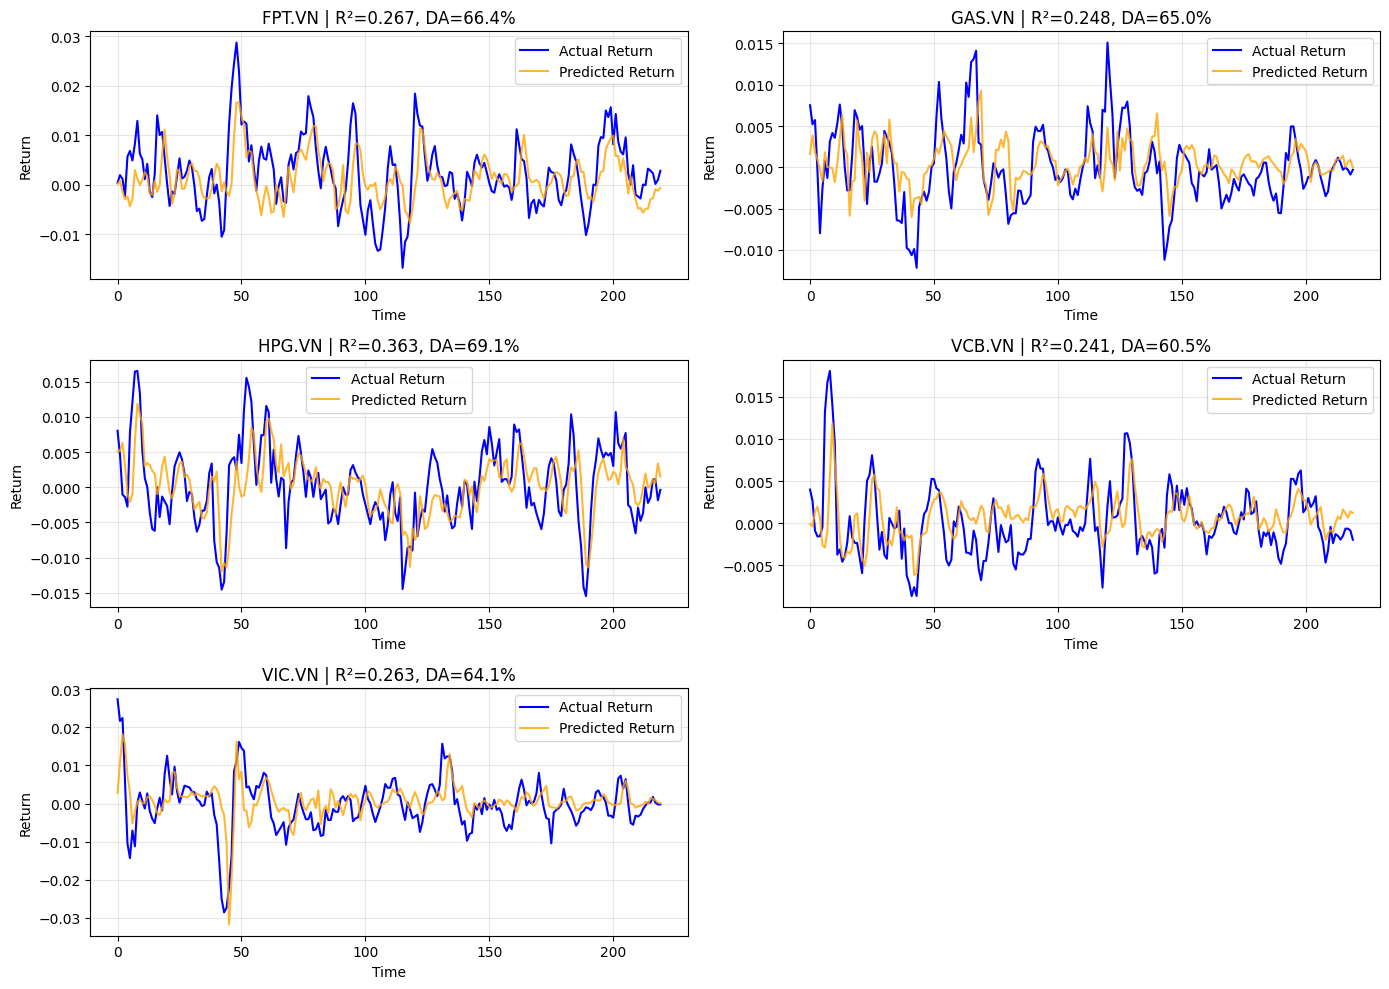

In [ ]:
plt.figure(figsize=(14, 10))

for i, ticker in enumerate(results_lstm.keys(), 1):
    plt.subplot(3, 2, i)

    y_true = results_lstm[ticker]["y_true"]
    y_pred = results_lstm[ticker]["y_pred"]

    plt.plot(y_true, label="Actual Return",  color='blue')
    plt.plot(y_pred, label="Predicted Return", color='orange', alpha=0.8)

    plt.title(
        f"{ticker} | R²={results_lstm[ticker]['r2']:.3f}, "
        f"DA={results_lstm[ticker]['da']:.1f}%"
    )
    plt.xlabel("Time")
    plt.ylabel("Return")
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
summary_lstm = pd.DataFrame({
    ticker: {
        "Num_Features": len(results_lstm[ticker]["features"]),
        "MAE": results_lstm[ticker]["mae"],
        "RMSE": results_lstm[ticker]["rmse"],
        "R2": results_lstm[ticker]["r2"],
        "DA (%)": results_lstm[ticker]["da"]
    }
    for ticker in results_lstm
}).T

# Làm đẹp bảng
summary_lstm = summary_lstm.astype({
    "Num_Features": int,
    "MAE": float,
    "RMSE": float,
    "R2": float,
    "DA (%)": float
})

print(summary_lstm.round(4))


        Num_Features     MAE    RMSE      R2   DA (%)
FPT.VN            11  0.0047  0.0060  0.2672  66.3636
GAS.VN             9  0.0029  0.0038  0.2479  65.0000
HPG.VN            10  0.0035  0.0045  0.3626  69.0909
VCB.VN             9  0.0027  0.0036  0.2408  60.4545
VIC.VN            10  0.0041  0.0059  0.2628  64.0909


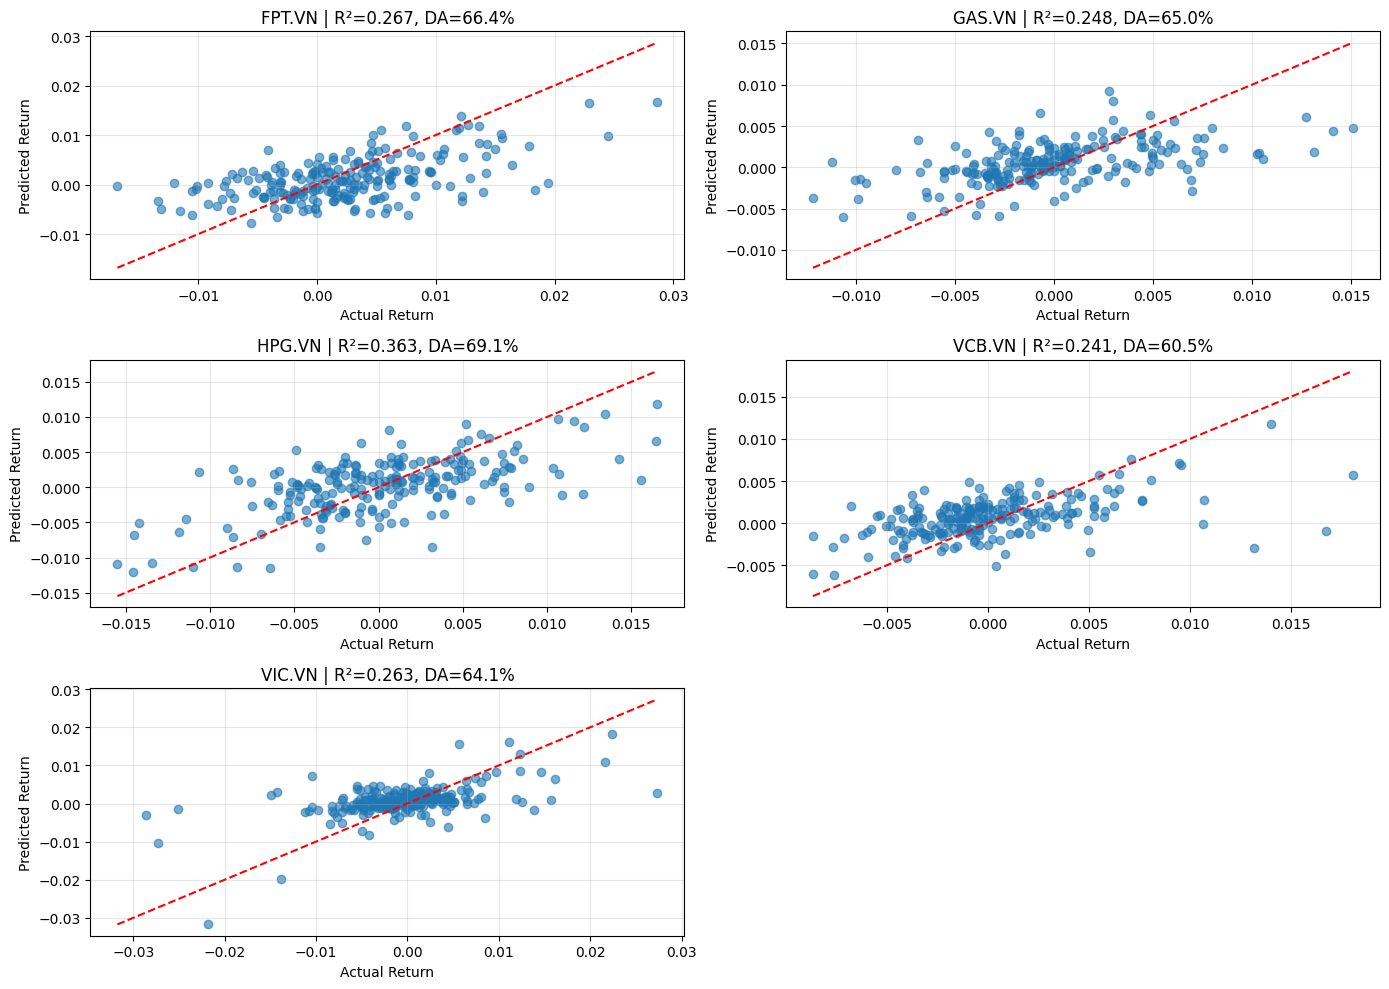

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 10))

for i, ticker in enumerate(results_lstm.keys(), 1):
    plt.subplot(3, 2, i)   # chỉnh (rows, cols) nếu số mã khác

    y_true = results_lstm[ticker]["y_true"]
    y_pred = results_lstm[ticker]["y_pred"]

    plt.scatter(y_true, y_pred, alpha=0.6)

    # Đường y = x (perfect prediction)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], linestyle='--',color='red',linewidth=1.5)

    plt.title(
        f"{ticker} | R²={results_lstm[ticker]['r2']:.3f}, "
        f"DA={results_lstm[ticker]['da']:.1f}%"
    )
    plt.xlabel("Actual Return")
    plt.ylabel("Predicted Return")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
results_tables_by_ticker = {}

for ticker in TICKERS:

    print(f"\n📈 LSTM predictions for {ticker}")

    # 1. Dữ liệu theo mã
    df_tk = (
        df[df['ticker'] == ticker]
        .sort_values('date')
        .reset_index(drop=True)
    )

    # 2. Lấy feature riêng của mã đó (từ LASSO)
    features_tk = selected_features_by_ticker[ticker]

    if len(features_tk) == 0:
        print(f"⚠️ {ticker}: LASSO không chọn feature nào → bỏ qua")
        continue

    X = df_tk[features_tk].values
    y = df_tk['target'].values
    dates = pd.to_datetime(df_tk['date'])

    # 3. Split giống lúc train LSTM
    split_index = int(len(X) * 0.8)

    X_test = X[split_index:]
    y_test = y[split_index:]
    dates_test = dates[split_index:]

    # 4. Do LSTM dùng SEQ_LEN → bỏ SEQ_LEN ngày đầu
    dates_test_seq = dates_test.iloc[SEQ_LEN:].reset_index(drop=True)

    # 5. Lấy kết quả đã predict
    y_true = results_lstm[ticker]['y_true']
    y_pred = results_lstm[ticker]['y_pred']

    # 6. Check an toàn
    assert len(dates_test_seq) == len(y_pred), f"Lệch dữ liệu {ticker}"

    # 7. Tạo bảng kết quả
    df_result = pd.DataFrame({
        'Date': dates_test_seq.dt.strftime('%Y-%m-%d'),
        'Ticker': ticker,
        'Actual': y_true,
        'Predicted_LSTM': y_pred
    })

    results_tables_by_ticker[ticker] = df_result

    print(df_result.head(10))



📈 LSTM predictions for FPT.VN
         Date  Ticker    Actual  Predicted_LSTM
0  2024-02-19  FPT.VN  0.000384        0.000159
1  2024-02-20  FPT.VN  0.001898        0.000718
2  2024-02-21  FPT.VN  0.001151       -0.001417
3  2024-02-22  FPT.VN -0.002297       -0.002967
4  2024-02-23  FPT.VN  0.005634       -0.002407
5  2024-02-26  FPT.VN  0.006787       -0.004415
6  2024-02-27  FPT.VN  0.004851       -0.002921
7  2024-02-28  FPT.VN  0.008241        0.002914
8  2024-02-29  FPT.VN  0.012860        0.001236
9  2024-03-01  FPT.VN  0.006199       -0.000077

📈 LSTM predictions for GAS.VN
         Date  Ticker    Actual  Predicted_LSTM
0  2024-02-19  GAS.VN  0.007519        0.001645
1  2024-02-20  GAS.VN  0.005215        0.003875
2  2024-02-21  GAS.VN  0.005730        0.001811
3  2024-02-22  GAS.VN -0.000523        0.000956
4  2024-02-23  GAS.VN -0.007975       -0.000314
5  2024-02-26  GAS.VN -0.002561       -0.001675
6  2024-02-27  GAS.VN  0.000771        0.001838
7  2024-02-28  GAS.VN -0.0

In [ ]:
ticker = "VCB.VN"   # ← đổi sang mã bạn muốn
# 1. Dữ liệu theo mã
df_tk = (
    df[df['ticker'] == ticker]
    .sort_values('date')
    .reset_index(drop=True)
)

# 2. Feature riêng của mã (từ LASSO)
features_tk = selected_features_by_ticker[ticker]

if len(features_tk) == 0:
    raise ValueError(f"{ticker}: LASSO không chọn feature nào")

X = df_tk[features_tk].values
y = df_tk['target'].values
dates = pd.to_datetime(df_tk['date'])

# 3. Split giống lúc train LSTM
split_index = int(len(X) * 0.8)

dates_test = dates[split_index:]

# 4. Bỏ SEQ_LEN ngày đầu test (do LSTM dùng sequence)
dates_test_seq = dates_test.iloc[SEQ_LEN:].reset_index(drop=True)

# 5. Kết quả LSTM đã train
y_true = results_lstm[ticker]['y_true']
y_pred = results_lstm[ticker]['y_pred']

# 6. Check an toàn
assert len(dates_test_seq) == len(y_pred), "Lệch date và prediction"

# 7. Tạo bảng kết quả
df_result_1_ticker = pd.DataFrame({
    'Date': dates_test_seq.dt.strftime('%Y-%m-%d'),
    'Ticker': ticker,
    'Actual': y_true,
    'Predicted_LSTM': y_pred
})

# 8. In kết quả
print(df_result_1_ticker.head(15))


          Date  Ticker    Actual  Predicted_LSTM
0   2024-02-19  VCB.VN  0.003982       -0.000108
1   2024-02-20  VCB.VN  0.002649       -0.000366
2   2024-02-21  VCB.VN -0.000892        0.001362
3   2024-02-22  VCB.VN -0.001569        0.001960
4   2024-02-23  VCB.VN -0.001558        0.000636
5   2024-02-26  VCB.VN -0.000439       -0.002606
6   2024-02-27  VCB.VN  0.013154       -0.002888
7   2024-02-28  VCB.VN  0.016712       -0.000933
8   2024-02-29  VCB.VN  0.018057        0.005693
9   2024-03-01  VCB.VN  0.014022        0.011815
10  2024-03-04  VCB.VN  0.009434        0.007095
11  2024-03-05  VCB.VN -0.003731        0.003296
12  2024-03-06  VCB.VN -0.003107       -0.001885
13  2024-03-07  VCB.VN -0.004574       -0.003939
14  2024-03-08  VCB.VN -0.003998       -0.004105


In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

results_hybrid = {}

for ticker in TICKERS:
    print(f"\nTraining Hybrid KRR on LSTM output for {ticker}")

    # 1. Data theo mã
    df_tk = (
        df[df['ticker'] == ticker]
        .sort_values('date')
        .reset_index(drop=True)
    )

    features_tk = selected_features_by_ticker[ticker]
    if len(features_tk) == 0:
        print(f"⚠️ {ticker}: No LASSO features → skip")
        continue

    X = df_tk[features_tk].values
    y = df_tk['target'].values

    # 2. Split giống LSTM
    split_index = int(len(X) * 0.8)

    X_test = X[split_index:]
    y_test = y[split_index:]

    # 3. Do LSTM dùng SEQ_LEN
    X_test_seq = X_test[SEQ_LEN:]
    y_test_seq = y_test[SEQ_LEN:]

    # ===== 4. LSTM output =====
    y_pred_lstm = results_lstm[ticker]['y_pred']
    y_true = results_lstm[ticker]['y_true']

    # Safety check
    assert len(X_test_seq) == len(y_pred_lstm) == len(y_true), \
        f"Length mismatch for {ticker}"

    # ===== 5. KRR input =====
    X_krr = np.hstack([
        X_test_seq,
        y_pred_lstm.reshape(-1, 1)
    ])
    y_krr = y_true

    # 6. Scale
    scaler = StandardScaler()
    X_krr_scaled = scaler.fit_transform(X_krr)

    # 7. GridSearch KRR
    param_grid = {
        "alpha": [1e-3, 1e-2, 1e-1, 1],
        "kernel": ["linear", "rbf"],
        "gamma": [0.01, 0.1, 1]
    }

    grid_krr = GridSearchCV(
        KernelRidge(),
        param_grid,
        cv=3,
        scoring="neg_mean_squared_error"
    )
    grid_krr.fit(X_krr_scaled, y_krr)

    best_krr = grid_krr.best_estimator_

    # 8. Predict
    y_pred_hybrid = best_krr.predict(X_krr_scaled)

    # 9. Metrics
    mae = mean_absolute_error(y_krr, y_pred_hybrid)
    rmse = np.sqrt(mean_squared_error(y_krr, y_pred_hybrid))
    r2 = r2_score(y_krr, y_pred_hybrid)
    da = np.mean((y_krr > 0) == (y_pred_hybrid > 0)) * 100

    print(f"{ticker}: MAE={mae:.4f}, RMSE={rmse:.4f}, R²={r2:.3f}, DA={da:.2f}%")

    results_hybrid[ticker] = {
        "model": best_krr,
        "y_true": y_krr,
        "y_pred_lstm": y_pred_lstm,
        "y_pred_hybrid": y_pred_hybrid,
        "mae": mae,
        "rmse": rmse,
        "r2": r2,
        "da": da,
        "best_params": grid_krr.best_params_
    }



Training Hybrid KRR on LSTM output for FPT.VN
FPT.VN: MAE=0.0023, RMSE=0.0030, R²=0.817, DA=84.09%

Training Hybrid KRR on LSTM output for GAS.VN
GAS.VN: MAE=0.0016, RMSE=0.0022, R²=0.754, DA=83.64%

Training Hybrid KRR on LSTM output for HPG.VN
HPG.VN: MAE=0.0021, RMSE=0.0028, R²=0.753, DA=84.09%

Training Hybrid KRR on LSTM output for VCB.VN
VCB.VN: MAE=0.0016, RMSE=0.0022, R²=0.704, DA=82.73%

Training Hybrid KRR on LSTM output for VIC.VN
VIC.VN: MAE=0.0023, RMSE=0.0032, R²=0.784, DA=85.00%


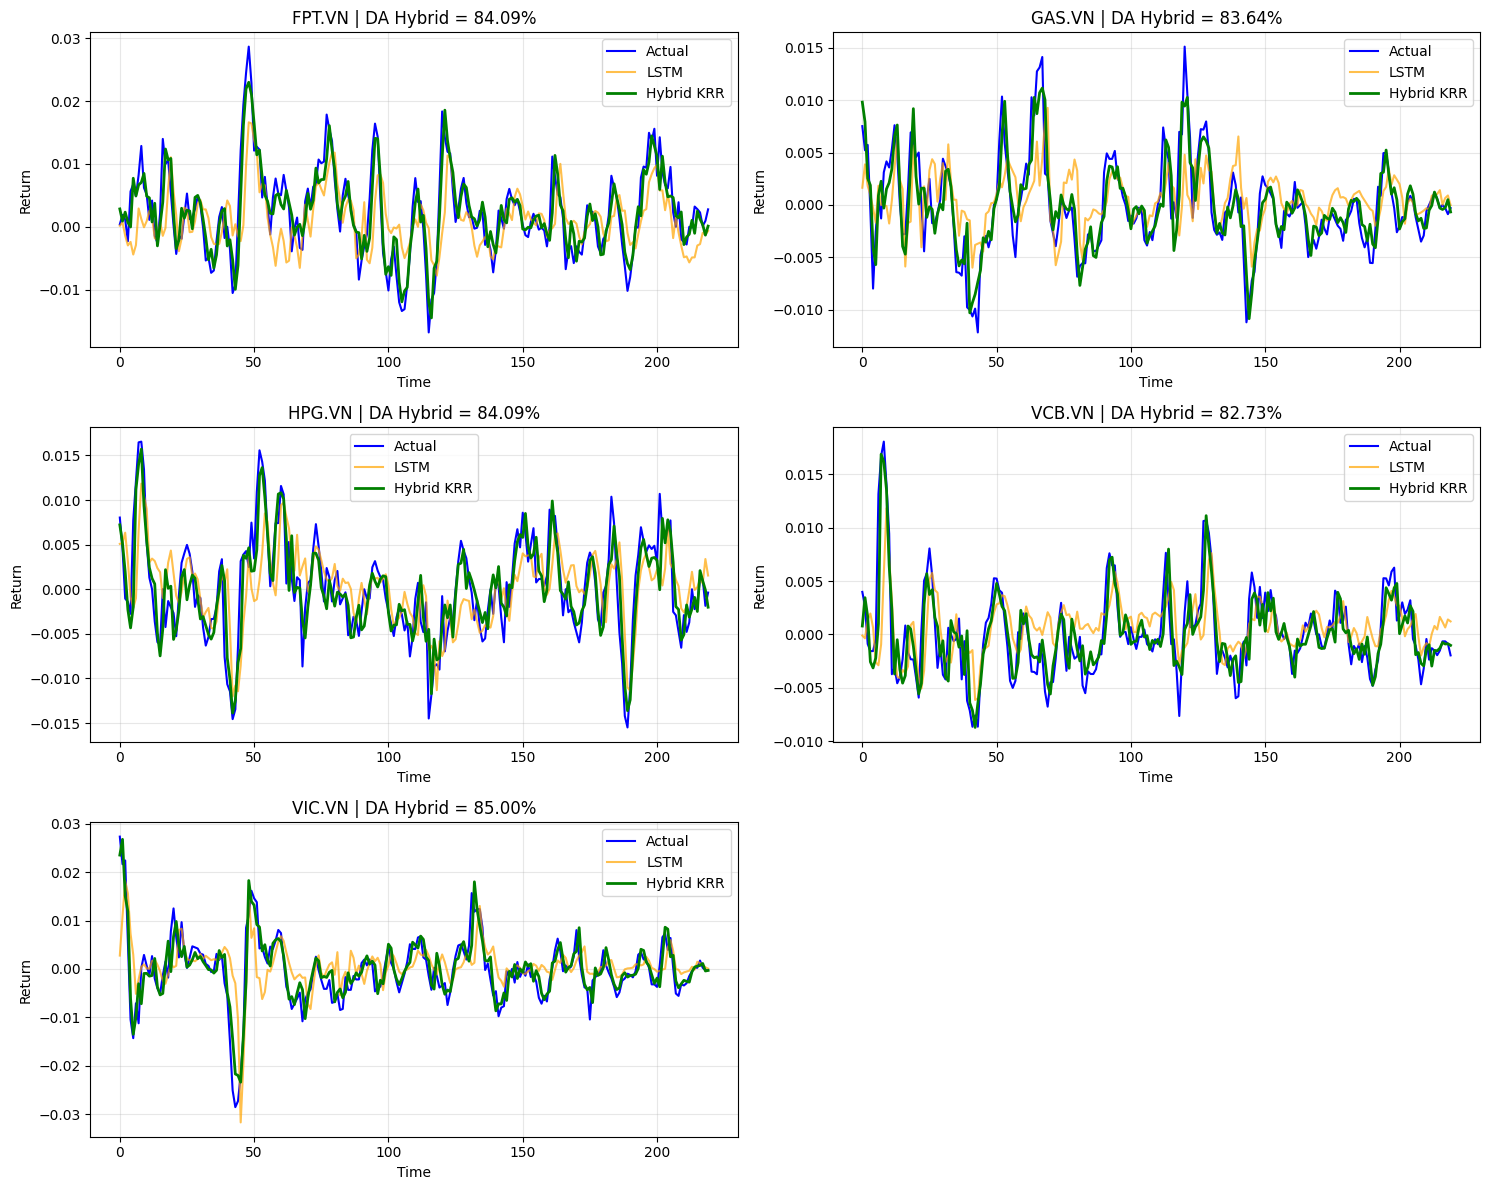

In [ ]:
plt.figure(figsize=(15, 12))

for i, ticker in enumerate(results_hybrid.keys(), 1):
    r = results_hybrid[ticker]

    plt.subplot(3, 2, i)
    plt.plot(r["y_true"], label="Actual", color="blue")
    plt.plot(r["y_pred_lstm"], label="LSTM", color="orange", alpha=0.7)
    plt.plot(
        r["y_pred_hybrid"],
        label="Hybrid KRR",
        color="green",
        linewidth=2
    )

    plt.title(f"{ticker} | DA Hybrid = {r['da']:.2f}%")
    plt.xlabel("Time")
    plt.ylabel("Return")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
summary_hybrid = []

for ticker, r in results_hybrid.items():
    summary_hybrid.append({
        "Ticker": ticker,
        "MAE_Hybrid": round(r["mae"], 5),
        "RMSE_Hybrid": round(r["rmse"], 5),
        "R2_Hybrid": round(r["r2"], 3),
        "DA_Hybrid (%)": round(r["da"], 2),
        "Kernel": r["best_params"]["kernel"],
        "Alpha": r["best_params"]["alpha"],
        "Gamma": r["best_params"]["gamma"]
    })

df_hybrid_summary = pd.DataFrame(summary_hybrid)

print("\n📊 HYBRID (LSTM → KRR) PERFORMANCE SUMMARY")
print(df_hybrid_summary)



📊 HYBRID (LSTM → KRR) PERFORMANCE SUMMARY
   Ticker  MAE_Hybrid  RMSE_Hybrid  R2_Hybrid  DA_Hybrid (%)  Kernel  Alpha  \
0  FPT.VN     0.00232      0.00299      0.817          84.09     rbf  0.100   
1  GAS.VN     0.00163      0.00220      0.754          83.64  linear  0.001   
2  HPG.VN     0.00209      0.00281      0.753          84.09  linear  0.010   
3  VCB.VN     0.00164      0.00222      0.704          82.73  linear  0.001   
4  VIC.VN     0.00231      0.00317      0.784          85.00  linear  0.100   

   Gamma  
0   0.01  
1   0.01  
2   0.01  
3   0.01  
4   0.01  


In [ ]:
results_hybrid_tables = {}

for ticker in results_hybrid.keys():

    print(f"\n📈 Hybrid predictions for {ticker}")

    # 1. Lấy dữ liệu theo mã
    df_tk = (
        df[df['ticker'] == ticker]
        .sort_values('date')
        .reset_index(drop=True)
    )

    dates = pd.to_datetime(df_tk['date'])

    # 2. Split giống LSTM
    split_index = int(len(df_tk) * 0.8)
    dates_test = dates[split_index:]

    # 3. Do LSTM dùng SEQ_LEN
    dates_test_seq = dates_test.iloc[SEQ_LEN:].reset_index(drop=True)

    # 4. Lấy kết quả Hybrid
    y_true = results_hybrid[ticker]['y_true']
    y_pred_hybrid = results_hybrid[ticker]['y_pred_hybrid']

    # 5. Check an toàn
    assert len(dates_test_seq) == len(y_pred_hybrid), f"Lệch dữ liệu {ticker}"

    # 6. Tạo bảng kết quả
    df_result = pd.DataFrame({
        "Date": dates_test_seq.dt.strftime('%Y-%m-%d'),
        "Ticker": ticker,
        "Actual": y_true,
        "Predicted_Hybrid": y_pred_hybrid
    })

    # 7. Lưu theo mã
    results_hybrid_tables[ticker] = df_result

    # 8. In 10 dòng đầu
    print(df_result.head(10))



📈 Hybrid predictions for FPT.VN
         Date  Ticker    Actual  Predicted_Hybrid
0  2024-02-19  FPT.VN  0.000384          0.002843
1  2024-02-20  FPT.VN  0.001898          0.000904
2  2024-02-21  FPT.VN  0.001151          0.002330
3  2024-02-22  FPT.VN -0.002297          0.000705
4  2024-02-23  FPT.VN  0.005634         -0.000033
5  2024-02-26  FPT.VN  0.006787          0.007725
6  2024-02-27  FPT.VN  0.004851          0.004914
7  2024-02-28  FPT.VN  0.008241          0.006668
8  2024-02-29  FPT.VN  0.012860          0.007049
9  2024-03-01  FPT.VN  0.006199          0.008492

📈 Hybrid predictions for GAS.VN
         Date  Ticker    Actual  Predicted_Hybrid
0  2024-02-19  GAS.VN  0.007519          0.009806
1  2024-02-20  GAS.VN  0.005215          0.007924
2  2024-02-21  GAS.VN  0.005730          0.002541
3  2024-02-22  GAS.VN -0.000523          0.001881
4  2024-02-23  GAS.VN -0.007975         -0.004047
5  2024-02-26  GAS.VN -0.002561         -0.005693
6  2024-02-27  GAS.VN  0.000771   

In [ ]:
!pip install PyPortfolioOpt

In [ ]:
# Tạo DataFrame với giá đóng cửa cho từng cổ phiếu
df_close = pd.concat({tk: d['Close'] for tk, d in stocks_data.items()}, axis=1)
df_close.columns = df_close.columns.droplevel(0)  # Đổi tên cột sau khi concat

# Tính toán tỷ lệ log return hàng ngày
daily_log_returns = np.log(df_close / df_close.shift(1))


In [ ]:
def compute_performance_metrics(pnl_daily, rf_annual=0.03, trading_days=252):

    pnl_daily = pnl_daily.dropna()
    if len(pnl_daily) == 0:
        return dict.fromkeys(
            ["Ann_Return", "Ann_Vol", "Sharpe", "Max_Drawdown"], np.nan
        )

    cum_log = pnl_daily.cumsum()
    wealth = np.exp(cum_log)

    total_return = wealth.iloc[-1] - 1
    ann_return = (1 + total_return)**(trading_days / len(pnl_daily)) - 1
    ann_vol = pnl_daily.std() * np.sqrt(trading_days)
    sharpe = (ann_return - rf_annual) / ann_vol if ann_vol > 0 else np.nan

    peak = wealth.cummax()
    drawdown = (wealth - peak) / peak
    max_dd = drawdown.min()

    return {
        "Ann_Return": ann_return,
        "Ann_Vol": ann_vol,
        "Sharpe": sharpe,
        "Max_Drawdown": max_dd
    }


In [ ]:
from pypfopt import risk_models
from pypfopt.efficient_frontier import EfficientFrontier
import cvxpy as cp

def optimize_portfolio_rolling(
    log_returns,
    predicted_returns,
    window=120,
    holding_period=120,
    risk_aversion=1.0
):

    tickers = predicted_returns.columns
    rebalance_dates = predicted_returns.index[::holding_period]

    weights_history = pd.DataFrame(index=rebalance_dates, columns=tickers)
    pnl_daily = pd.Series(index=log_returns.index, dtype=float)

    for reb_date in rebalance_dates:

        if reb_date not in log_returns.index:
            continue

        past_ret = log_returns.loc[:reb_date].iloc[-window:]
        if len(past_ret) < window:
            continue

        # Covariance
        S = risk_models.sample_cov(past_ret)

        # Expected return
        mu = predicted_returns.loc[reb_date].dropna()
        common_assets = S.index.intersection(mu.index)

        if len(common_assets) < 2:
            continue

        ef = EfficientFrontier(
            mu.loc[common_assets],
            S.loc[common_assets, common_assets],
            solver=cp.OSQP
        )

        ef.max_quadratic_utility(risk_aversion=risk_aversion)
        w = pd.Series(ef.clean_weights())

        # Full vector
        w_full = pd.Series(0.0, index=tickers)
        w_full.update(w)
        if w_full.sum() > 0:
            w_full /= w_full.sum()

        weights_history.loc[reb_date] = w_full

        # Apply to next holding period
        start = log_returns.index.get_loc(reb_date) + 1
        end = start + holding_period
        ret_slice = log_returns.iloc[start:end]

        pnl_daily.loc[ret_slice.index] = ret_slice.dot(w_full)

    pnl_daily = pnl_daily.loc[predicted_returns.index.min():].dropna()
    return weights_history.dropna(how="all"), pnl_daily


In [ ]:
WINDOW = 120
HOLDING_PERIOD = 120
RISK_AVERSION = 1.0

# Prepare pred_df from KRR hybrid predictions
pred_list = []

for ticker in results_hybrid.keys():

    # 1. Dữ liệu theo mã
    df_tk = (
        df[df['ticker'] == ticker]
        .sort_values('date')
        .reset_index(drop=True)
    )

    dates = pd.to_datetime(df_tk['date'])

    # 2. Split giống LSTM + KRR
    split_index = int(len(df_tk) * 0.8)
    dates_test = dates[split_index:]
    # 3. Do LSTM dùng SEQ_LEN
    dates_test_seq = dates_test.iloc[SEQ_LEN:].reset_index(drop=True)

    # 4. Hybrid prediction
    y_pred_hybrid = results_hybrid[ticker]['y_pred_hybrid']

    # 5. Safety check
    assert len(dates_test_seq) == len(y_pred_hybrid), f"Date mismatch {ticker}"

    # 6. Tạo bảng long
    df_tmp = pd.DataFrame({
        "date": dates_test_seq,
        "ticker": ticker,
        "predicted_return": y_pred_hybrid
    })

    pred_list.append(df_tmp)

# 7. Pivot sang wide format (date × ticker)
pred_long = pd.concat(pred_list, ignore_index=True)
pred_df = pred_long.pivot(index="date", columns="ticker", values="predicted_return").sort_index()

weights_hybrid, pnl_hybrid = optimize_portfolio_rolling(
    log_returns=daily_log_returns,
    predicted_returns=pred_df,
    window=WINDOW,
    holding_period=HOLDING_PERIOD,
    risk_aversion=RISK_AVERSION
)

# Assets có trong Hybrid
common_assets = pred_df.columns.tolist()

# Index backtest Hybrid
common_idx = pnl_hybrid.index
eq_ret_daily = (
    daily_log_returns
    .loc[common_idx, common_assets]
    .mean(axis=1)
)
eq_ret_daily.name = "Equal_Weight"

stats_hybrid = compute_performance_metrics(pnl_hybrid)
stats_ew     = compute_performance_metrics(eq_ret_daily)



avg_weights = (
    weights_hybrid
    .mean()
    .sort_values(ascending=False)
)
weight_rows = []

for ticker, weight in avg_weights.items():
    weight_rows.append({
        "Item": ticker,
        "Value": f"{weight:.2%}"
    })

weight_rows.append({"Item": "---", "Value": "---"})
weight_rows.append({
    "Item": "Total Average Weight",
    "Value": f"{avg_weights.sum():.2%}"
})

df_weights = pd.DataFrame(weight_rows)
performance_rows = [
    {
        "Item": "Expected Return (Annualized)",
        "Value": f"{stats_hybrid['Ann_Return']:.2%}"
    },
    {
        "Item": "Volatility (Annualized)",
        "Value": f"{stats_hybrid['Ann_Vol']:.2%}"
    },
    {
        "Item": "Sharpe Ratio",
        "Value": f"{stats_hybrid['Sharpe']:.4f}"
    },
    {
        "Item": "Max Drawdown",
        "Value": f"{stats_hybrid['Max_Drawdown']:.2%}"
    }
]

df_performance = pd.DataFrame(performance_rows)
summary_table_data = pd.concat(
    [
        pd.DataFrame([{"Item": "**Asset Weights (Average)**", "Value": ""}]),
        df_weights,
        pd.DataFrame([{"Item": "\n**Portfolio Performance**", "Value": ""}]),
        df_performance
    ],
    ignore_index=True
)
print("\n===== Table: Average Optimal Portfolio Weights and Performance Metrics (Hybrid 6-month) =====")
print(summary_table_data.to_markdown(index=False))




===== Table: Average Optimal Portfolio Weights and Performance Metrics (Hybrid 6-month) =====
| Item                         | Value   |
|:-----------------------------|:--------|
| **Asset Weights (Average)**  |         |
| VCB.VN                       | 26.49%  |
| FPT.VN                       | 24.04%  |
| VIC.VN                       | 19.98%  |
| GAS.VN                       | 15.64%  |
| HPG.VN                       | 13.86%  |
| ---                          | ---     |
| Total Average Weight         | 100.00% |
| **Portfolio Performance**    |         |
| Expected Return (Annualized) | 10.24%  |
| Volatility (Annualized)      | 13.27%  |
| Sharpe Ratio                 | 0.5454  |
| Max Drawdown                 | -8.59%  |


In [ ]:
# Assets có trong Hybrid
common_assets = pred_df.columns.tolist()

# Index backtest Hybrid
common_idx = pnl_hybrid.index
eq_ret_daily = (
    daily_log_returns
    .loc[common_idx, common_assets]
    .mean(axis=1)
)
eq_ret_daily.name = "Equal_Weight"

stats_hybrid = compute_performance_metrics(pnl_hybrid)
stats_ew     = compute_performance_metrics(eq_ret_daily)

summary = pd.DataFrame({
    "Hybrid": stats_hybrid,
    "Equal_Weight": stats_ew
})

print("\nPORTFOLIO PERFORMANCE SUMMARY")
print(summary.applymap(lambda x: round(x, 6)))




PORTFOLIO PERFORMANCE SUMMARY
                Hybrid  Equal_Weight
Ann_Return    0.102390      0.081827
Ann_Vol       0.132728      0.129296
Sharpe        0.545400      0.400839
Max_Drawdown -0.085860     -0.085117


/tmp/ipython-input-609475132.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(summary.applymap(lambda x: round(x, 6)))


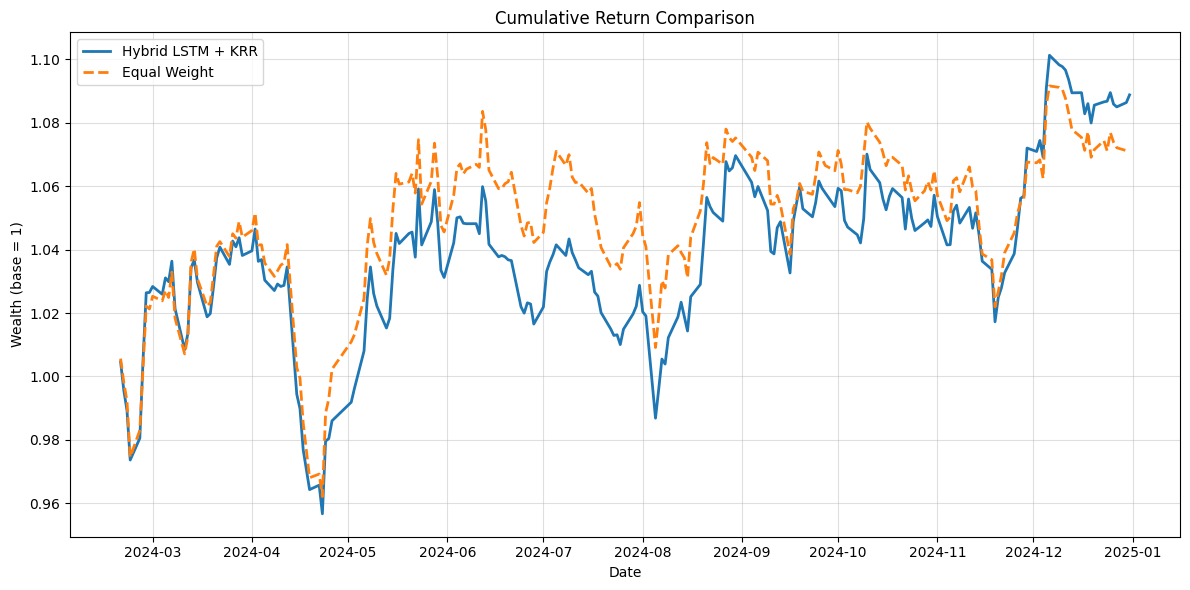

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(
    np.exp(pnl_hybrid.cumsum()),
    label="Hybrid LSTM + KRR",
    linewidth=2
)

plt.plot(
    np.exp(eq_ret_daily.cumsum()),
    label="Equal Weight",
    linestyle="--",
    linewidth=2
)

plt.title("Cumulative Return Comparison")
plt.ylabel("Wealth (base = 1)")
plt.xlabel("Date")
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()
